<a href="https://colab.research.google.com/github/Colsai/DATA-690-WANG/blob/master/states_simple_cleaned_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [692]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Introduction: National School Expenditure, Enrollment, and Progress Metrics

I would like to focus on current educational progress for K-12 students. Despite the obvious wealth of the US, as a country, there is much evidence suggesting that our educational attainment lacks in comparison to other countries.

How much money is being spent on students currently?
What can be said about our funding of students?
And maybe, what can be said of their peformance?
This notebook will look at trends in school funding and expenditures at a state level. In a future look, I will look to expand this with more information and performance data (unfortunately, the data from the dataset that I used turned out to largely be too limited to make conjectures).

## A. Importing the Necessary Libraries to do the work and Getting Data
We'll use Pandas, Matplotlib, Seaborn, and Look to Stop Deprecation warnings* (took this out for now)

In [693]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [694]:
os.getcwd()

'/content'

In [695]:
#This Zip file from the Kaggle included Multiple Files.
os.listdir("/content/drive/My Drive/archive/")

['EdStatsCountry.csv',
 'EdStatsCountry-Series.csv',
 'EdStatsSeries.csv',
 'EdStatsData.csv',
 'EdStatsFootNote.csv',
 'states_all_extended.csv',
 'states_all.csv',
 'input_data',
 'output_data',
 'sanity_checks',
 'states_all_extended.gsheet']

## B. We are getting the data from a zip of states education data

## The Two States Files-
- states_all_extended.csv has information on student performance, by race
- states_all.csv has more basic information, without race.

In [696]:
states_extended_df = pd.read_csv("/content/drive/My Drive/archive/states_all_extended.csv")

In [697]:
states_extended_df.sample(5)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,A_A_A,G01_A_A,G02_A_A,G03_A_A,G04_A_A,G05_A_A,G06_A_A,G07_A_A,G08_A_A,G09_A_A,G10_A_A,G11_A_A,G12_A_A,KG_A_A,PK_A_A,G01-G08_A_A,G09-G12_A_A,G01_AM_F,G01_AM_M,G01_AS_F,G01_AS_M,G01_BL_F,G01_BL_M,G01_HI_F,G01_HI_M,G01_HP_F,G01_HP_M,...,G04_A_A_READING,G04_A_A_MATHEMATICS,G04_A_M_READING,G04_A_M_MATHEMATICS,G04_A_F_READING,G04_A_F_MATHEMATICS,G04_WH_A_READING,G04_WH_A_MATHEMATICS,G04_BL_A_READING,G04_BL_A_MATHEMATICS,G04_HI_A_READING,G04_HI_A_MATHEMATICS,G04_AS_A_READING,G04_AS_A_MATHEMATICS,G04_AM_A_READING,G04_AM_A_MATHEMATICS,G04_HP_A_READING,G04_HP_A_MATHEMATICS,G04_TR_A_READING,G04_TR_A_MATHEMATICS,G08_A_A_READING,G08_A_A_MATHEMATICS,G08_A_M_READING,G08_A_M_MATHEMATICS,G08_A_F_READING,G08_A_F_MATHEMATICS,G08_WH_A_READING,G08_WH_A_MATHEMATICS,G08_BL_A_READING,G08_BL_A_MATHEMATICS,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
1004,2011_OHIO,OHIO,2011,1655534.0,23488657.0,2533882.0,9834235.0,11120540.0,23010396.0,11074360.0,7570565.0,935953.0,2494681.0,1740030.0,130527.0,129983.0,129674.0,130406.0,133152.0,134459.0,134468.0,134219.0,148538.0,135373.0,121027.0,117866.0,131323.0,29015.0,1056888.0,522804.0,77.0,89.0,1350.0,1261.0,10560.0,10915.0,3240.0,3444.0,35.0,45.0,...,224.0,244.0,222.0,245.0,226.0,243.0,229.0,249.0,204.0,226.0,211.0,233.0,NaN,254.0,NaN,NaN,NaN,NaN,219.0,240.0,268.0,289.0,263.0,290.0,273.0,288.0,274.0,295.0,247.0,263.0,252.0,273.0,NaN,NaN,NaN,NaN,NaN,NaN,261.0,284.0
1383,1989_IOWA,IOWA,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,478486.0,38181.0,37088.0,37690.0,37298.0,35598.0,34654.0,34743.0,33143.0,35041.0,32489.0,31472.0,33795.0,38136.0,3417.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,2011_NORTH_CAROLINA,NORTH_CAROLINA,2011,1448117.0,14409515.0,2046954.0,7488570.0,4873991.0,13767024.0,7566249.0,3843709.0,696313.0,980517.0,1507864.0,117693.0,107431.0,117034.0,116325.0,118534.0,117223.0,115038.0,113238.0,125149.0,111972.0,102663.0,94017.0,117944.0,33603.0,922516.0,433801.0,797.0,818.0,1516.0,1581.0,14583.0,15011.0,9701.0,9931.0,67.0,64.0,...,221.0,245.0,217.0,245.0,225.0,244.0,232.0,253.0,206.0,229.0,207.0,238.0,236.0,265.0,192.0,225.0,NaN,NaN,222.0,247.0,263.0,286.0,256.0,285.0,270.0,287.0,271.0,296.0,247.0,267.0,256.0,275.0,275.0,316.0,245.0,265.0,NaN,NaN,268.0,292.0
1407,2017_LOUISIANA,LOUISIANA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715135.0,54585.0,53478.0,55396.0,55835.0,55456.0,53698.0,52928.0,52222.0,56596.0,51715.0,47551.0,45114.0,53070.0,27491.0,NaN,200976.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,212.0,229.0,210.0,229.0,213.0,229.0,225.0,242.0,198.0,216.0,208.0,224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257.0,267.0,253.0,267.0,261.0,266.0,269.0,279.0,242.0,252.0,253.0,263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1567,1991_SOUTH_DAKOTA,SOUTH_DAKOTA,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131576.0,10768.0,10477.0,10465.0,10793.0,10727.0,10713.0,10433.0,9762.0,9651.0,9045.0,8339.0,7692.0,10451.0,531.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [698]:
#Let's focus on states_all.csv, which is the simpler form of data.
states_df = pd.read_csv("/content/drive/My Drive/archive/states_all.csv")

### B2. Head/ Tail/ Sample of states_extended df
Briefly looking at our dataset, we see that there are some NaN values here.

In [699]:
#We know that data starts at at least 1992, assuming that it is correctly ordered
states_df.head(5)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [700]:
#We know that the the data contains information until at least 2019- hard to know yet if it is ordered
states_df.tail(5)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0
1714,2019_WYOMING,WYOMING,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.0,286.0,227.0,265.0


In [701]:
states_df.sample(5)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
552,2002_TENNESSEE,TENNESSEE,2002,897695.0,5785857.0,550490.0,2544653.0,2690714.0,6363357.0,3478604.0,1624709.0,328546.0,762594.0,15952.0,70151.0,71300.0,70650.0,53273.0,571785.0,254271.0,927608.0,NaN,NaN,214.0,260.0
1534,1986_OREGON,OREGON,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1617.0,26878.0,34941.0,33088.0,32009.0,NaN,NaN,449307.0,NaN,NaN,NaN,NaN
475,2001_KANSAS,KANSAS,2001,468347.0,3681845.0,238960.0,2253677.0,1189208.0,3491029.0,1721113.0,1159966.0,220701.0,209716.0,2032.0,30104.0,34932.0,36120.0,33221.0,280126.0,143570.0,470205.0,NaN,NaN,NaN,NaN
1496,1990_NEW_MEXICO,NEW_MEXICO,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1406.0,23280.0,23323.0,20487.0,15454.0,NaN,NaN,301881.0,NaN,256.0,NaN,NaN
922,2010_CALIFORNIA,CALIFORNIA,2010,6213958.0,67356719.0,9715980.0,34173911.0,23466828.0,71227111.0,34657275.0,20704755.0,3556156.0,7150441.0,72404.0,468036.0,463691.0,476639.0,492545.0,3749960.0,1993538.0,6289578.0,NaN,NaN,NaN,NaN


### B3. More Cleaning- Should we try to remove null values?

In [702]:
states_df[states_df.notnull()]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [703]:
#How many null values are there?
states_df.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [704]:
states_df2 = states_df.dropna()
states_df2.shape

(355, 25)

In [705]:
#Taking out the nulls seems to lead to to many missing values and not enough data
states_df2

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,1521462.0,424662.0,432279.0,1852.0,56541.0,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,514052.0,55715.0,247005.0,1883.0,9475.0,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,1964229.0,303924.0,864642.0,9376.0,76365.0,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,972598.0,170767.0,247245.0,2573.0,36391.0,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,17030335.0,2995767.0,7341541.0,114939.0,456941.0,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,5075509.0,627473.0,1086722.0,33453.0,90942.0,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,4510672.0,546926.0,1601069.0,13733.0,79692.0,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,1161944.0,233836.0,232738.0,15077.0,20163.0,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,3691809.0,513402.0,894823.0,55907.0,58078.0,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


## C. Let's just stick with the regular file. 
Deleting all missing values seems to create some issues. In particular, NAEP scores appear to only happen every two years.


In [706]:
#I'll insert one small column in here- Total Expenditure Per Student
states_df.insert(10, "EXPENDITURE_PER_STUDENT", states_df["TOTAL_REVENUE"]/states_df["ENROLL"])

In [707]:
states_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,EXPENDITURE_PER_STUDENT,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,NaN,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,NaN,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,NaN,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,NaN,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,NaN,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [708]:
#Looking at aggregating by state-
states_df_mn =states_df.groupby('STATE').agg(['mean'])

In [709]:
states_df_mn.sample(10)

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,EXPENDITURE_PER_STUDENT,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
STATE,,,,,,,,,,,,,,,,,,,,,,,,
NATIONAL,2004.437500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.846154,277.769231,218.928571,263.615385
LOUISIANA,2002.030303,7.166416e+05,6034237.48,886902.24,2739625.16,2407710.08,5966403.88,3117506.92,8.810608,1858890.76,3.535788e+05,484398.64,19450.375000,58343.68750,59011.03125,55119.78125,40490.21875,442466.55,191359.238095,7.424842e+05,226.636364,265.500000,207.230769,254.636364
VERMONT,2002.030303,9.346662e+04,1454059.64,80249.92,890339.92,483469.80,1444050.60,687690.72,16.121354,374619.84,3.861400e+04,55902.40,3748.600000,6827.37500,7118.43750,7217.40625,6702.15625,54872.95,29639.904762,9.649581e+04,243.000000,289.200000,227.000000,272.000000
WYOMING,2002.030303,9.166442e+04,1173952.68,86561.00,611459.16,475932.52,1152672.48,572053.40,13.228613,354948.52,3.542100e+04,176112.16,738.470588,7223.68750,7162.12500,7262.65625,6479.78125,54758.00,27743.333333,9.343384e+04,241.454545,283.333333,223.692308,267.363636
NEW_JERSEY,2002.030303,1.262230e+06,20129735.60,858881.76,7848969.24,11421884.60,20051592.24,10600125.56,15.874315,6548690.24,7.719090e+05,1217838.56,24426.218750,89876.53125,93358.56250,91086.59375,82546.21875,792867.40,381404.904762,1.284902e+06,244.000000,286.909091,227.181818,271.888889
NEW_YORK,2002.030303,2.748181e+06,42385624.88,2593569.68,17871100.24,21920954.96,44201162.80,27063674.24,15.865906,10875720.96,1.226114e+06,3685817.28,40456.406250,195563.28125,199271.81250,197167.21875,166942.96875,1636549.80,821184.761905,2.752745e+06,235.363636,277.083333,220.615385,264.363636
NEW_MEXICO,2002.030303,3.230488e+05,2705104.00,389986.36,1899793.72,415323.92,2725713.00,1296749.36,8.508857,865762.76,1.204595e+05,400929.96,5123.250000,24450.15625,24573.84375,24154.03125,18703.78125,202230.30,97539.857143,3.230853e+05,226.272727,266.250000,207.384615,253.909091
RHODE_ISLAND,2002.030303,1.463697e+05,1738021.60,129014.56,668599.08,940407.96,1697362.20,997960.72,12.243330,557979.80,6.622238e+04,28358.64,1289.687500,10400.78125,11194.40625,11076.96875,9593.12500,91596.75,45418.190476,1.467565e+05,234.090909,274.416667,220.153846,262.818182


Text(0, 0.5, 'Total Expenditure/Enrollment')

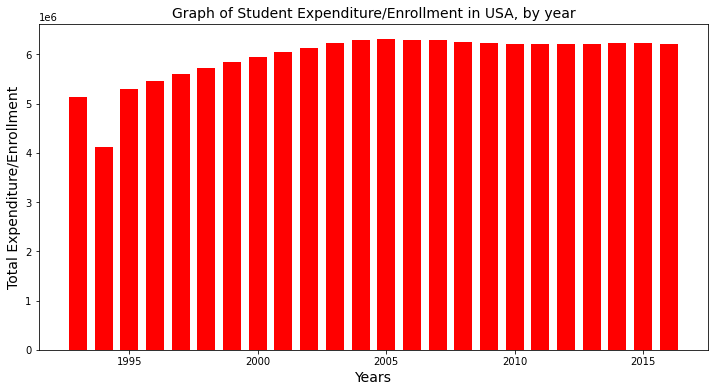

In [710]:
#Showing Progression of funding over years (USA), enrollment
year = states_df['YEAR']
enroll = states_df['ENROLL']

fig, ax = plt.subplots(figsize = (12,6))

ax.bar(year, enroll, width=.7, align='center',color='red')

ax.set_title("Graph of Student Expenditure/Enrollment in USA, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Expenditure/Enrollment", color='black', size = 14)

Let's take a quick look at total revenue and total expenditure on schools in all states, as bar graphs. They will be plotted at the same time.

Text(0, 0.5, 'Total Expenditure Per Student (Total EXP/ENROLL)')

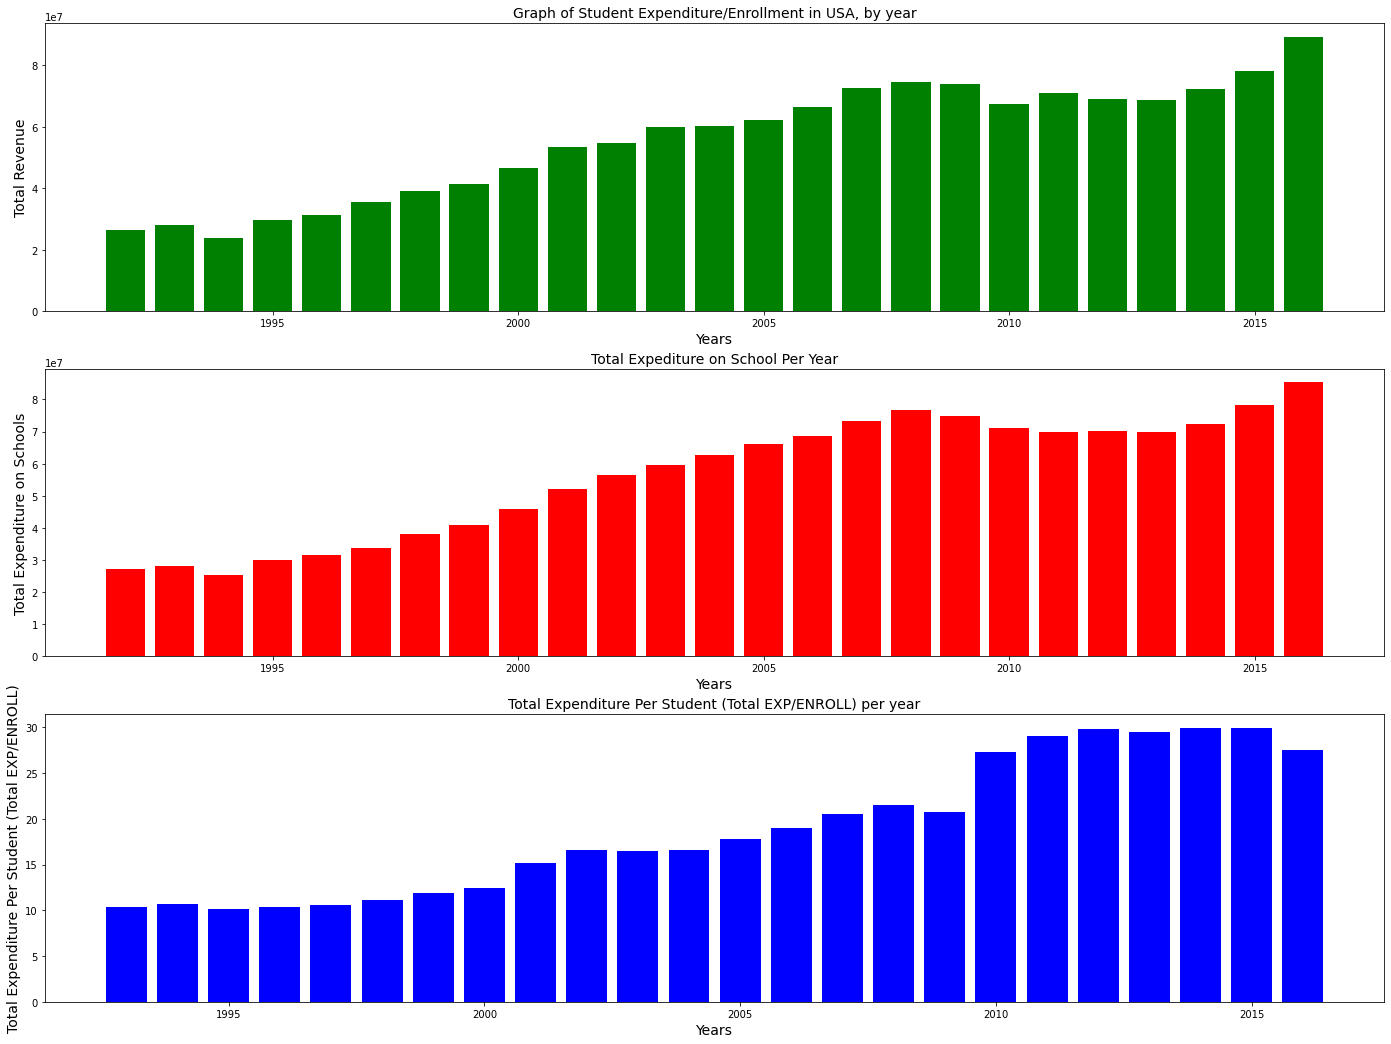

In [711]:
#Showing Progression of funding over years (USA), enrollment
year = states_df['YEAR']
revenue = states_df['TOTAL_REVENUE']
total_exp = states_df['TOTAL_EXPENDITURE']
exp_per_stu = states_df['EXPENDITURE_PER_STUDENT']

fig, ax = plt.subplots(3, figsize = (24,18))

ax[0].bar(year, revenue, color = "green")

ax[0].set_title("Graph of Student Expenditure/Enrollment in USA, by year", color='black', size = 14)
ax[0].set_xlabel("Years", color='black', size = 14)
ax[0].set_ylabel("Total Revenue", color='black', size = 14)

ax[1].bar(year, total_exp, color = "red")

ax[1].set_title("Total Expediture on School Per Year", color='black', size = 14)
ax[1].set_xlabel("Years", color='black', size = 14)
ax[1].set_ylabel("Total Expenditure on Schools", color='black', size = 14)

ax[2].bar(year, exp_per_stu, color = "blue")

ax[2].set_title("Total Expenditure Per Student (Total EXP/ENROLL) per year", color='black', size = 14)
ax[2].set_xlabel("Years", color='black', size = 14)
ax[2].set_ylabel("Total Expenditure Per Student (Total EXP/ENROLL)", color='black', size = 14)

## D. Specifically Looking at Trends in Certain States
Let's focus on three key questions before exploring the educational outcomes:  
- How has Maryland Student Enrollment changed over time?
- How has total expenditure increased over time (in percentage)?
- How has expenditure per student changed?
- Has this had an effect on academic outcomes?


In [712]:
#Small function to return states
def state_finder(dataframe, column, name, exact=True):
    if exact == True:
        find_it = dataframe[dataframe[column].str.match(name, case=False)] #Rewrote with match instead of contains to prevent west virginia/virginia

    else:
        find_it = dataframe[dataframe[column].str.contains(name, case=False)] #Rewrote with match instead of contains to prevent west virginia/virginia
    return find_it

In [713]:
md_df = state_finder(states_df, "STATE", "maryland", False)

### Note: Nan Values Removed?
We find a lot of NaN and missing values from 1980s years, however there is still some data in there (they are not all NaN). We'll keep it for now in case we need the enrollment data for each grade later.

In [714]:
md_df.head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,EXPENDITURE_PER_STUDENT,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
20,1992_MARYLAND,MARYLAND,1992,NaN,4658498.0,228336.0,1778834.0,2651328.0,4698374.0,2628891.0,NaN,1461083.0,NaN,340298.0,16081.0,59641.0,60287.0,52815.0,40426.0,NaN,NaN,751850.0,217.0,265.0,211.0,NaN
71,1993_MARYLAND,MARYLAND,1993,751850.0,4918010.0,252211.0,1940713.0,2725086.0,4898895.0,2785206.0,6.541212,1508203.0,224147.0,324925.0,17984.0,60378.0,61199.0,55285.0,40661.0,NaN,NaN,772638.0,NaN,NaN,NaN,NaN
122,1994_MARYLAND,MARYLAND,1994,772638.0,5141505.0,258611.0,2002382.0,2880512.0,5187683.0,2812922.0,6.654481,1673254.0,254041.0,387699.0,18834.0,62341.0,61982.0,57222.0,43223.0,NaN,NaN,790938.0,NaN,NaN,210.0,NaN
173,1995_MARYLAND,MARYLAND,1995,790938.0,5580123.0,270249.0,2059219.0,3250655.0,5610071.0,3064702.0,7.055070,1768323.0,253194.0,458731.0,19092.0,63232.0,62207.0,58835.0,42974.0,NaN,NaN,805544.0,NaN,NaN,NaN,NaN
224,1996_MARYLAND,MARYLAND,1996,805544.0,5688918.0,271806.0,2163187.0,3253925.0,5825606.0,3197895.0,7.062206,1856055.0,251330.0,449601.0,19639.0,61856.0,63693.0,59236.0,44232.0,NaN,NaN,818583.0,NaN,NaN,NaN,NaN
275,1997_MARYLAND,MARYLAND,1997,818583.0,6040883.0,292260.0,2343928.0,3404695.0,6217120.0,3359984.0,7.379683,1893583.0,289761.0,592725.0,19739.0,60385.0,64763.0,60010.0,46532.0,514894.0,221995.0,830744.0,NaN,NaN,NaN,NaN
326,1998_MARYLAND,MARYLAND,1998,830744.0,6521269.0,325321.0,2514101.0,3681847.0,6519389.0,3584678.0,7.849914,1902782.0,302974.0,558202.0,20013.0,57813.0,67230.0,62174.0,49321.0,525146.0,231534.0,841671.0,NaN,NaN,212.0,261.0
377,1999_MARYLAND,MARYLAND,1999,841671.0,6850334.0,372016.0,2686695.0,3791623.0,6892276.0,3660046.0,8.138969,2096627.0,304175.0,608284.0,19285.0,56942.0,69077.0,62776.0,50632.0,527889.0,236400.0,846582.0,NaN,NaN,NaN,NaN
428,2000_MARYLAND,MARYLAND,2000,846582.0,7419047.0,409021.0,2804218.0,4205808.0,7355698.0,3874590.0,8.763530,2189499.0,300044.0,760810.0,20031.0,56073.0,69279.0,64647.0,50962.0,530097.0,240843.0,852920.0,222.0,272.0,NaN,NaN
479,2001_MARYLAND,MARYLAND,2001,852920.0,7864290.0,467001.0,2928704.0,4468585.0,7981362.0,4172982.0,9.220431,2366854.0,369293.0,813068.0,20314.0,56384.0,67448.0,66211.0,52671.0,531432.0,246807.0,860640.0,NaN,NaN,NaN,NaN


### Small Graphs to see what is going on with enrollment and expenditure:
Let's just create an easy graph for looking at basic trends

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Enrollment')

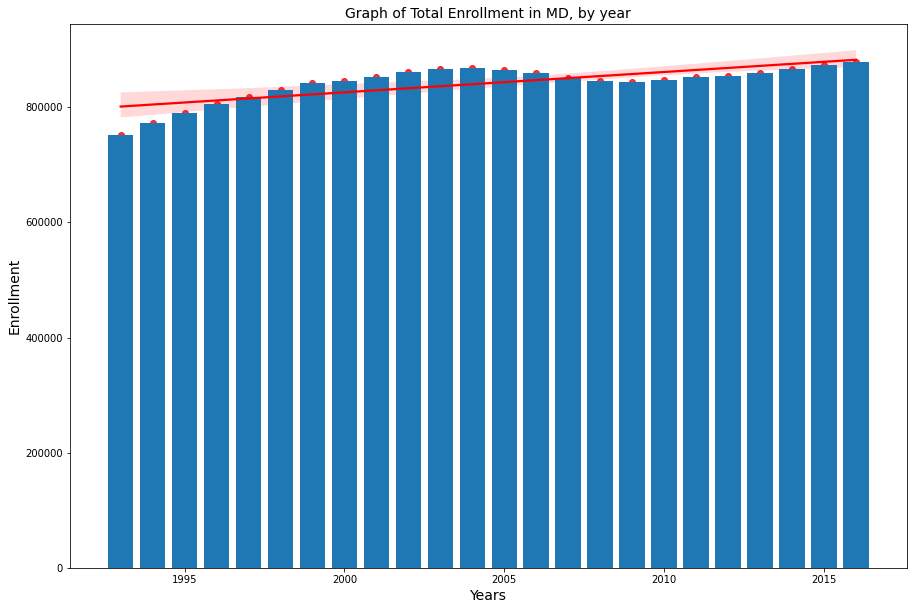

In [715]:
# Decreasing rate of expenditure over time
year = md_df['YEAR']
enroll = md_df['ENROLL']

fig, ax = plt.subplots(figsize = (15,10))

ax.bar(year, enroll)
sns.regplot(year, enroll, color = 'red')

ax.set_title("Graph of Total Enrollment in MD, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Enrollment", color='black', size = 14)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Total Expenditure')

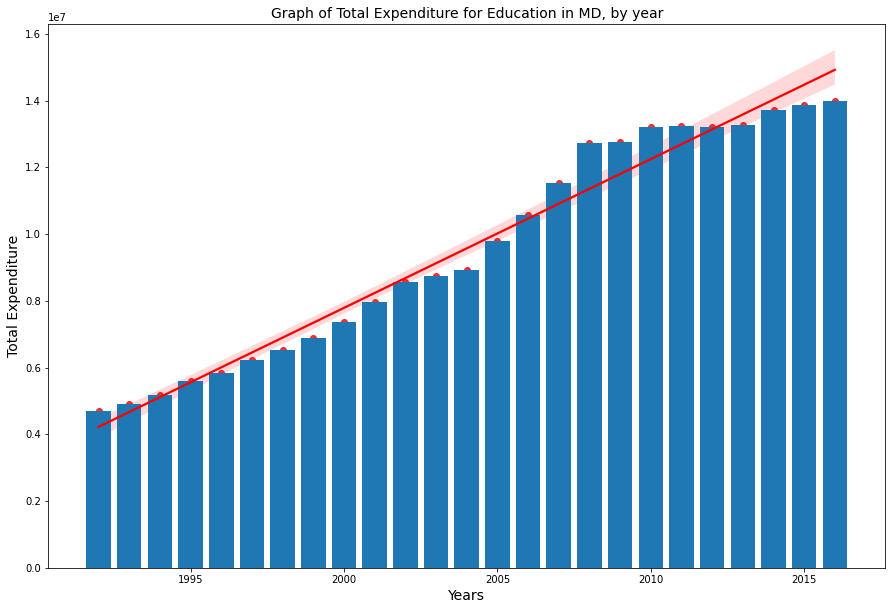

In [716]:
# Decreasing rate of expenditure over time
year = md_df['YEAR']
enroll = md_df['TOTAL_EXPENDITURE']

fig, ax = plt.subplots(figsize = (15,10))

ax.bar(year, enroll)
sns.regplot(year, enroll, color = 'red')

ax.set_title("Graph of Total Expenditure for Education in MD, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Expenditure", color='black', size = 14)

### Note: Some conclusions might be made with a look at these graphs...
but especially for enrollment, it is difficult to distinguish how much change there is per year. We will focus on rate of change in the next set of graphs.

### Let's Drop "Primary_Key"
Let's get rid of the primary key column. It doesn't seem to serve much purpose here.

In [717]:
#Sort The Values and Drop Primary_Key, since it does not have a use here
md_df = md_df.drop("PRIMARY_KEY", axis=1)
md_df = md_df.sort_values(by="YEAR")

## E. Exploring rate of change for Enrollment and Total Expenditure
Let's explore some of the changes in Maryland's Enrollment and Total Expenditure for the State. Later, we can do comparisons for whether other states may be spending more than Maryland is.

In [718]:
#We'll use a similar process from Assignment 7
md_enroll = md_df['ENROLL'].to_list()
print(md_enroll)

[nan, nan, nan, nan, nan, nan, nan, 751850.0, 772638.0, 790938.0, 805544.0, 818583.0, 830744.0, 841671.0, 846582.0, 852920.0, 860640.0, 866743.0, 869113.0, 865561.0, 860021.0, 851640.0, 845700.0, 843781.0, 848252.0, 851971.0, 853778.0, 859252.0, 865768.0, 874108.0, 879196.0, nan, nan]


In [719]:
#Let's run this as a function, similar to assignment #7
def percent_change(input_list, rounded_val=2):
    percent_list = []

    for this_year in input_list:
        try:
              pct_increase = ((this_year - last_year) / last_year) * 100
        except:
              pct_increase = 0

        percent_list.append(round(pct_increase,2))
        last_year = this_year

    percent_list = [round(i, rounded_val) for i in percent_list] #This function combines rounding inside of it, since percents are easier to use

    return percent_list

In [720]:
md_total_enr = percent_change(md_enroll)

In [721]:
md_df.insert(3, "Enrollment Percent Change", md_total_enr)

In [722]:
md_df.head(5)

,STATE,YEAR,ENROLL,Enrollment Percent Change,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,EXPENDITURE_PER_STUDENT,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1415,MARYLAND,1986,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9361.0,50505.0,48378.0,47315.0,47584.0,NaN,NaN,675747.0,NaN,NaN,NaN,NaN
1416,MARYLAND,1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10032.0,53146.0,49555.0,46717.0,48642.0,NaN,NaN,683797.0,NaN,NaN,NaN,NaN
1417,MARYLAND,1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10882.0,53667.0,52046.0,46782.0,47248.0,NaN,NaN,688947.0,NaN,NaN,NaN,NaN
1418,MARYLAND,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12238.0,54709.0,55009.0,46629.0,43302.0,NaN,NaN,698806.0,NaN,NaN,NaN,NaN
1419,MARYLAND,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14360.0,56617.0,57228.0,49864.0,40529.0,NaN,NaN,715176.0,NaN,261.0,NaN,NaN


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Total Expenditure/Enrollment')

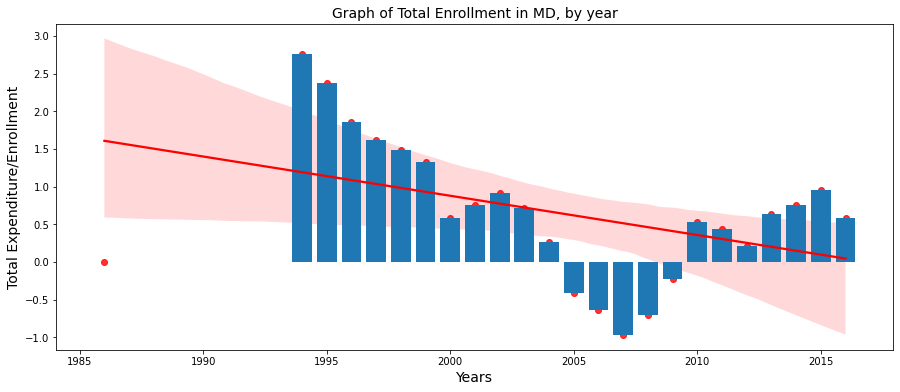

In [723]:
# Decreasing rate of expenditure over time
year = md_df['YEAR']
enroll = md_df['Enrollment Percent Change']

fig, ax = plt.subplots(figsize = (15,6))

ax.bar(year, enroll)
sns.regplot(year, enroll, color = 'red')

ax.set_title("Graph of Total Enrollment in MD, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Expenditure/Enrollment", color='black', size = 14)

## F.What about for Maryland Total Expenditure? 
We might expect a slowing rate in expenditures, with enrollment dropping.

In [724]:
md_total_expenditure = md_df['TOTAL_EXPENDITURE'].to_list()
print(md_total_expenditure)

[nan, nan, nan, nan, nan, nan, 4698374.0, 4898895.0, 5187683.0, 5610071.0, 5825606.0, 6217120.0, 6519389.0, 6892276.0, 7355698.0, 7981362.0, 8568446.0, 8732518.0, 8921938.0, 9782665.0, 10585292.0, 11541225.0, 12739693.0, 12757599.0, 13205691.0, 13247697.0, 13212140.0, 13284637.0, 13712839.0, 13882823.0, 13992191.0, nan, nan]


In [725]:
#Make a new list as md_total_exp_change
md_total_exp_chg = percent_change(md_total_expenditure)

In [726]:
#Made total exp_change
md_total_exp_chg[0:10]

[0, nan, nan, nan, nan, nan, nan, 4.27, 5.89, 8.14]

In [727]:
#Re-insert the list as a column back into the dataframe
md_df.insert(9, "Total Expenditure Percent Change", md_total_exp_chg)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Total Expenditure/Enrollment')

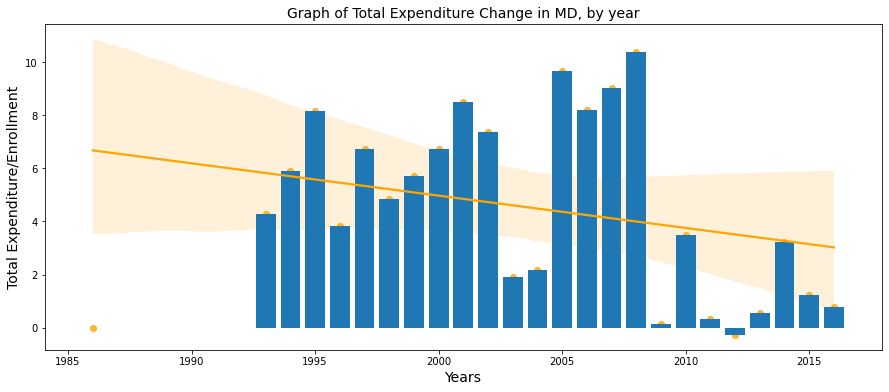

In [728]:
# Decreasing rate of expenditure over time
year = md_df['YEAR']
enroll = md_df['Enrollment Percent Change']
total_exp = md_df['Total Expenditure Percent Change']

fig, ax = plt.subplots(figsize = (15,6))

ax.bar(year, total_exp)
sns.regplot(year, total_exp, color = 'orange')

ax.set_title("Graph of Total Expenditure Change in MD, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Expenditure/Enrollment", color='black', size = 14)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Total Expenditure and Enrollment')

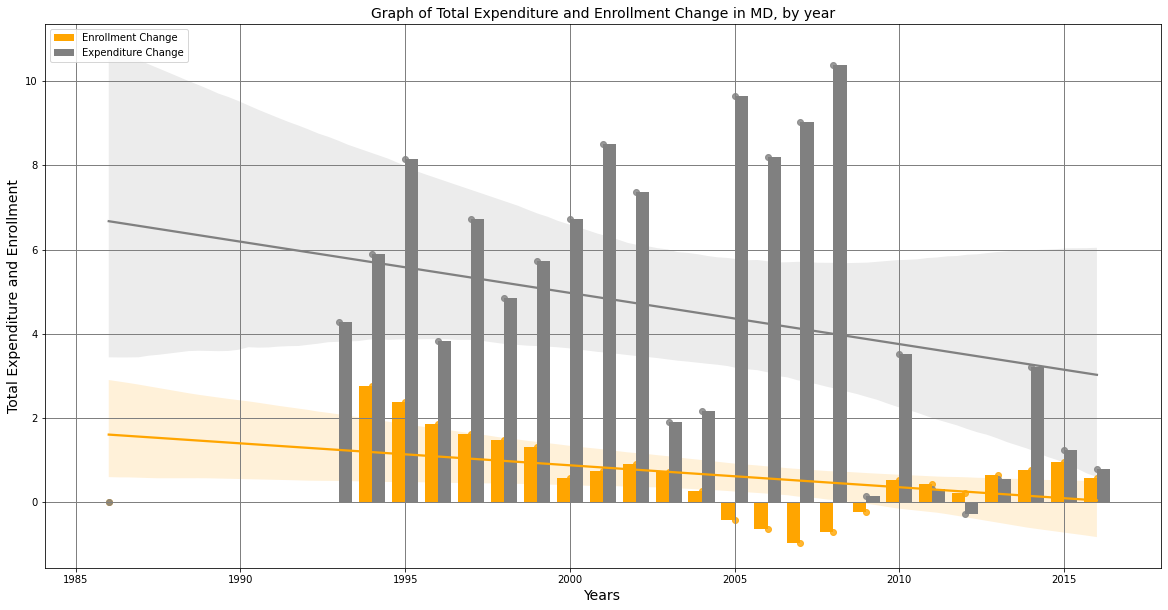

In [729]:
# Decreasing rate of expenditure over time
year = md_df['YEAR']
enroll = md_df['Enrollment Percent Change']
total_exp = md_df['Total Expenditure Percent Change']

fig, ax = plt.subplots(figsize = (20,10))

ax.bar(year-.2, enroll, width=.4, color = 'orange', label = 'Enrollment Change') 
ax.bar(year+.2, total_exp, width=.4, color = 'gray', label = 'Expenditure Change')

sns.regplot(year, enroll, color = 'orange')
sns.regplot(year, total_exp, color = 'gray')

plt.legend(loc="upper left")

ax.grid(color='gray',which='major', linestyle='-', linewidth=1)

ax.set_title("Graph of Total Expenditure and Enrollment Change in MD, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Expenditure and Enrollment", color='black', size = 14)

## Let's Compare Some of Those Values to Neighboring States (Delaware, Virginia)

Comparing Enrollment in Virginia

In [730]:
all_df = states_df.groupby(by="YEAR",  axis=0, as_index=False).agg('mean')

In [731]:
#Get the data for virginia
va_df = state_finder(states_df, "STATE", "VIRGINIA", True)

In [732]:
def add_pct_col(input_df,input_col,col_add=3, new_col_name="Enrollment Percent Change"):
    to_list = input_df[input_col].to_list()
    total_chg= percent_change(to_list)
    input_df.insert(col_add, new_col_name, total_chg)

In [733]:
#Add percent change columns for enrollment
add_pct_col(va_df,"ENROLL",4)
add_pct_col(all_df,"ENROLL",4)

In [734]:
va_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,Enrollment Percent Change,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,EXPENDITURE_PER_STUDENT,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
46,1992_VIRGINIA,VIRGINIA,1992,NaN,0.00,5631293.0,313971.0,2180133.0,3137189.0,5744469.0,2982862.0,NaN,1758078.0,NaN,523409.0,1976.0,82456.0,79821.0,76775.0,60854.0,NaN,NaN,1031925.0,221.0,268.0,221.0,NaN
97,1993_VIRGINIA,VIRGINIA,1993,1032842.0,NaN,5918536.0,365601.0,2358711.0,3194224.0,5955333.0,3121277.0,5.730340,1837782.0,303062.0,488487.0,3186.0,81787.0,81615.0,78443.0,60314.0,NaN,NaN,1045471.0,NaN,NaN,NaN,NaN
148,1994_VIRGINIA,VIRGINIA,1994,1044721.0,1.15,6125739.0,372866.0,2399644.0,3353229.0,6276362.0,3271356.0,5.863517,1883438.0,314439.0,587495.0,3115.0,85160.0,84103.0,79929.0,62899.0,NaN,NaN,1060809.0,NaN,NaN,213.0,NaN
199,1995_VIRGINIA,VIRGINIA,1995,1060809.0,1.54,6354418.0,368088.0,2522258.0,3464072.0,6590998.0,3452911.0,5.990162,1959389.0,337469.0,602745.0,3111.0,87618.0,82797.0,81254.0,62204.0,NaN,NaN,1079854.0,NaN,NaN,NaN,NaN
250,1996_VIRGINIA,VIRGINIA,1996,1079854.0,1.80,6674519.0,361726.0,2548036.0,3764757.0,6903384.0,3601237.0,6.180946,2045400.0,347988.0,721139.0,3917.0,86542.0,82571.0,80842.0,64497.0,NaN,NaN,1096093.0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Change of Enrollment (In Percent)')

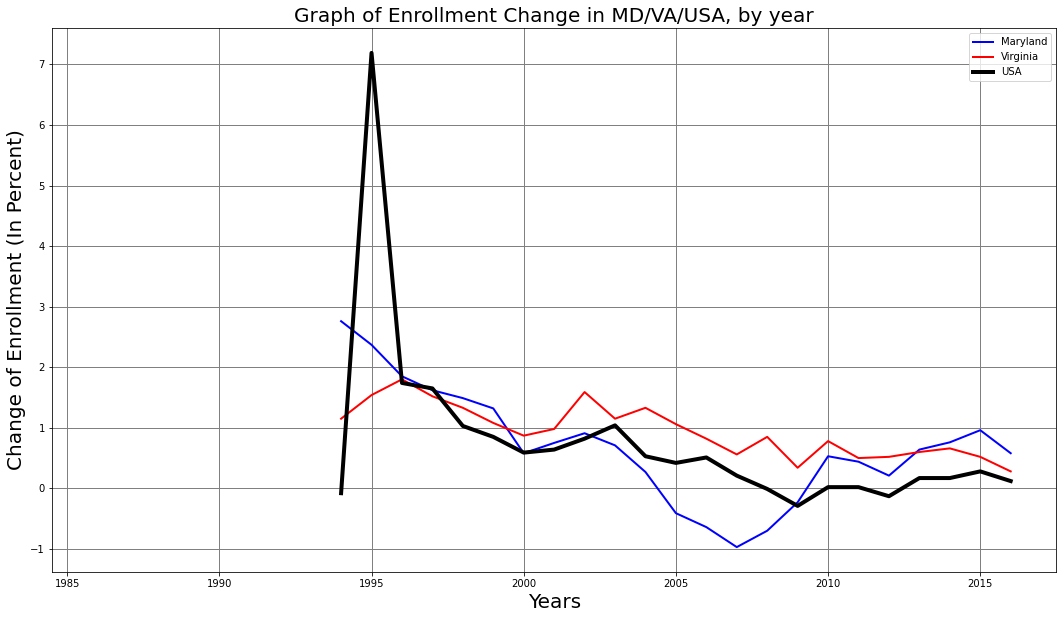

In [735]:
# Decreasing rate of expenditure over time
md_year = md_df['YEAR']
md_enroll = md_df['Enrollment Percent Change']

va_year = va_df['YEAR']
va_enroll = va_df['Enrollment Percent Change']

all_year = all_df['YEAR']
all_enroll = all_df['Enrollment Percent Change']

#Make the plots
fig, ax = plt.subplots(figsize = (18,10))

ax.plot(md_year, md_enroll, color = "blue", label = "Maryland", linewidth = 2)
ax.plot(va_year, va_enroll, color = "red", label = "Virginia", linewidth = 2)
ax.plot(all_year, all_enroll, color = "black", label = "USA", linewidth=4)

ax.grid(color='gray',which='major', linestyle='-', linewidth=1)

gf_font_size = 20

ax.set_title("Graph of Enrollment Change in MD/VA/USA, by year", color='black', size = gf_font_size)
ax.legend()
ax.set_xlabel("Years", color='black', size = gf_font_size)
ax.set_ylabel("Change of Enrollment (In Percent)", color='black', size = gf_font_size)

Interestingly, it looks like there are relatively similar trends in Maryland, Virginia, and the United States in terms of rate of enrollment by year.Except for 1994, where there was a huge spike, most of the other years are pretty normal. 


In [736]:
#Add Percent Columns For Total Expenditure
add_pct_col(va_df,"TOTAL_EXPENDITURE",10, "Total Expenditure Percent Change")
add_pct_col(all_df,"TOTAL_EXPENDITURE",10, "Total Expenditure Percent Change")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Total Expenditure Change, By Year')

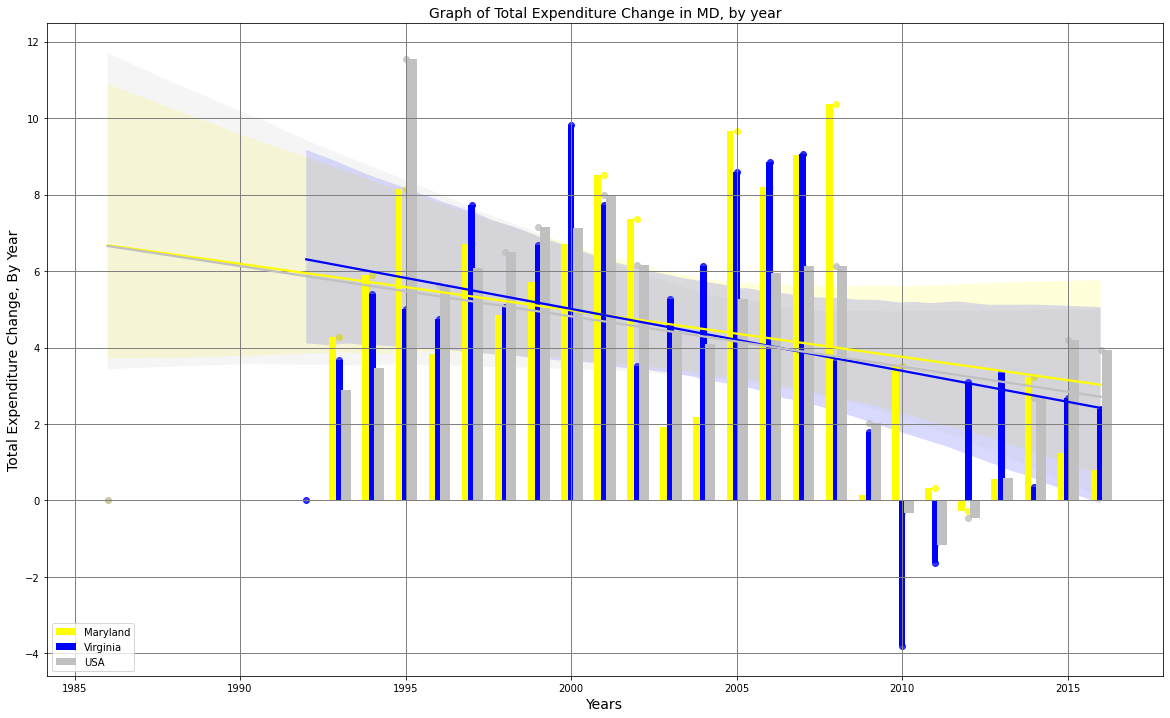

In [737]:
# Decreasing rate of expenditure over time
md_year = md_df['YEAR']
md_total_exp = md_df['Total Expenditure Percent Change']

va_year = va_df['YEAR']
va_total_exp = va_df['Total Expenditure Percent Change']

all_year = all_df['YEAR']
all_total_exp = all_df['Total Expenditure Percent Change']

fig, ax = plt.subplots(figsize = (20,12))

#Graph by bar, and check for regplot to see if the trend is upwards or downwards.

ax.bar(md_year-.2, md_total_exp,width = .2, label="Maryland", color = "yellow")
sns.regplot(md_year,md_total_exp, color = "yellow")

ax.bar(va_year+0, va_total_exp, width = .2, label = "Virginia", color = "blue")
sns.regplot(va_year,va_total_exp, color = "blue")

ax.bar(all_year+.2, all_total_exp, width = .3, label = "USA",color = 'silver')
sns.regplot(all_year,all_total_exp, color = "silver")

ax.grid(color='gray',which='major', linestyle='-', linewidth=1)
ax.legend()
ax.set_title("Graph of Total Expenditure Change in MD, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Expenditure Change, By Year", color='black', size = 14)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put i

Text(0, 0.5, 'Total Expenditure Change, By Year')

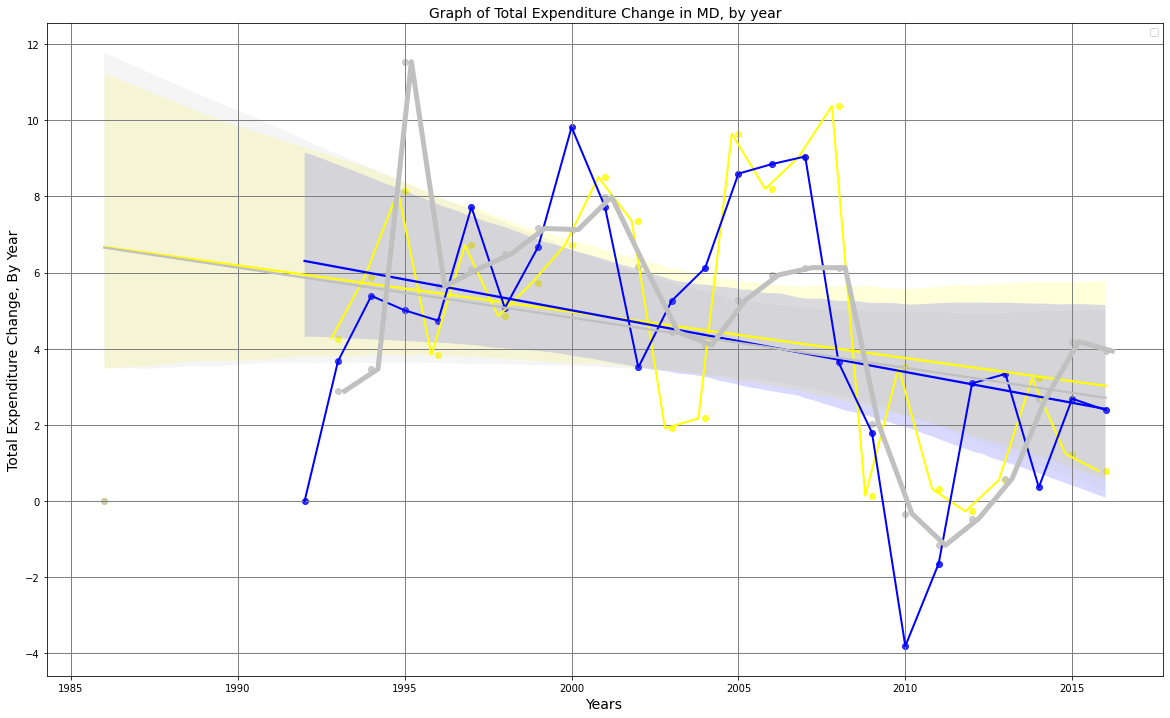

In [738]:
# Decreasing rate of expenditure over time
md_year = md_df['YEAR']
md_total_exp = md_df['Total Expenditure Percent Change']

va_year = va_df['YEAR']
va_total_exp = va_df['Total Expenditure Percent Change']

all_year = all_df['YEAR']
all_total_exp = all_df['Total Expenditure Percent Change']

fig, ax = plt.subplots(figsize = (20,12))

#Graph by bar, and check for regplot to see if the trend is upwards or downwards.
ax.plot(md_year-.2, md_total_exp, color = "yellow", linewidth = 2)
sns.regplot(md_year,md_total_exp, color = "yellow")

ax.plot(va_year+0, va_total_exp, color = "blue", linewidth=2)
sns.regplot(va_year,va_total_exp, color = "blue")

ax.plot(all_year+.2, all_total_exp, color = 'silver', linewidth = 5)
sns.regplot(all_year,all_total_exp, color = "silver")

ax.grid(color='gray',which='major', linestyle='-', linewidth=1)
ax.legend()
ax.set_title("Graph of Total Expenditure Change in MD, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Expenditure Change, By Year", color='black', size = 14)

Again, it appears as if there is a similar spending pattern for maryland and virginia, as goes the country. There are not strange fluctuations  her, though Virginia appears to vary by year more than the national average, or the 

## G. It appears like both Expenditure/Enrollment funding have not been declining in rate per year
However,  they mostly remain above zero, so both expenditure and enrollment are still growing.

In the next section, we will see how spending per student has changed over each year, so that we can eventually move into a look at whether increased spending is having positive effects on test scores (I may need to find more data on this)

In [739]:
va_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,Enrollment Percent Change,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,Total Expenditure Percent Change,INSTRUCTION_EXPENDITURE,EXPENDITURE_PER_STUDENT,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
46,1992_VIRGINIA,VIRGINIA,1992,NaN,0.00,5631293.0,313971.0,2180133.0,3137189.0,5744469.0,0.00,2982862.0,NaN,1758078.0,NaN,523409.0,1976.0,82456.0,79821.0,76775.0,60854.0,NaN,NaN,1031925.0,221.0,268.0,221.0,NaN
97,1993_VIRGINIA,VIRGINIA,1993,1032842.0,NaN,5918536.0,365601.0,2358711.0,3194224.0,5955333.0,3.67,3121277.0,5.730340,1837782.0,303062.0,488487.0,3186.0,81787.0,81615.0,78443.0,60314.0,NaN,NaN,1045471.0,NaN,NaN,NaN,NaN
148,1994_VIRGINIA,VIRGINIA,1994,1044721.0,1.15,6125739.0,372866.0,2399644.0,3353229.0,6276362.0,5.39,3271356.0,5.863517,1883438.0,314439.0,587495.0,3115.0,85160.0,84103.0,79929.0,62899.0,NaN,NaN,1060809.0,NaN,NaN,213.0,NaN
199,1995_VIRGINIA,VIRGINIA,1995,1060809.0,1.54,6354418.0,368088.0,2522258.0,3464072.0,6590998.0,5.01,3452911.0,5.990162,1959389.0,337469.0,602745.0,3111.0,87618.0,82797.0,81254.0,62204.0,NaN,NaN,1079854.0,NaN,NaN,NaN,NaN
250,1996_VIRGINIA,VIRGINIA,1996,1079854.0,1.80,6674519.0,361726.0,2548036.0,3764757.0,6903384.0,4.74,3601237.0,6.180946,2045400.0,347988.0,721139.0,3917.0,86542.0,82571.0,80842.0,64497.0,NaN,NaN,1096093.0,NaN,NaN,NaN,NaN


In [740]:
#Add Percent Columns For Total Expenditure
add_pct_col(va_df,"EXPENDITURE_PER_STUDENT",13, "Total Cost Per Student Percent Change")
add_pct_col(all_df,"EXPENDITURE_PER_STUDENT",13, "Total Cost Per Student Percent Change")
add_pct_col(md_df,"EXPENDITURE_PER_STUDENT",13, "Total Cost Per Student Percent Change")

Text(0, 0.5, 'Change of Enrollment (In Percent)')

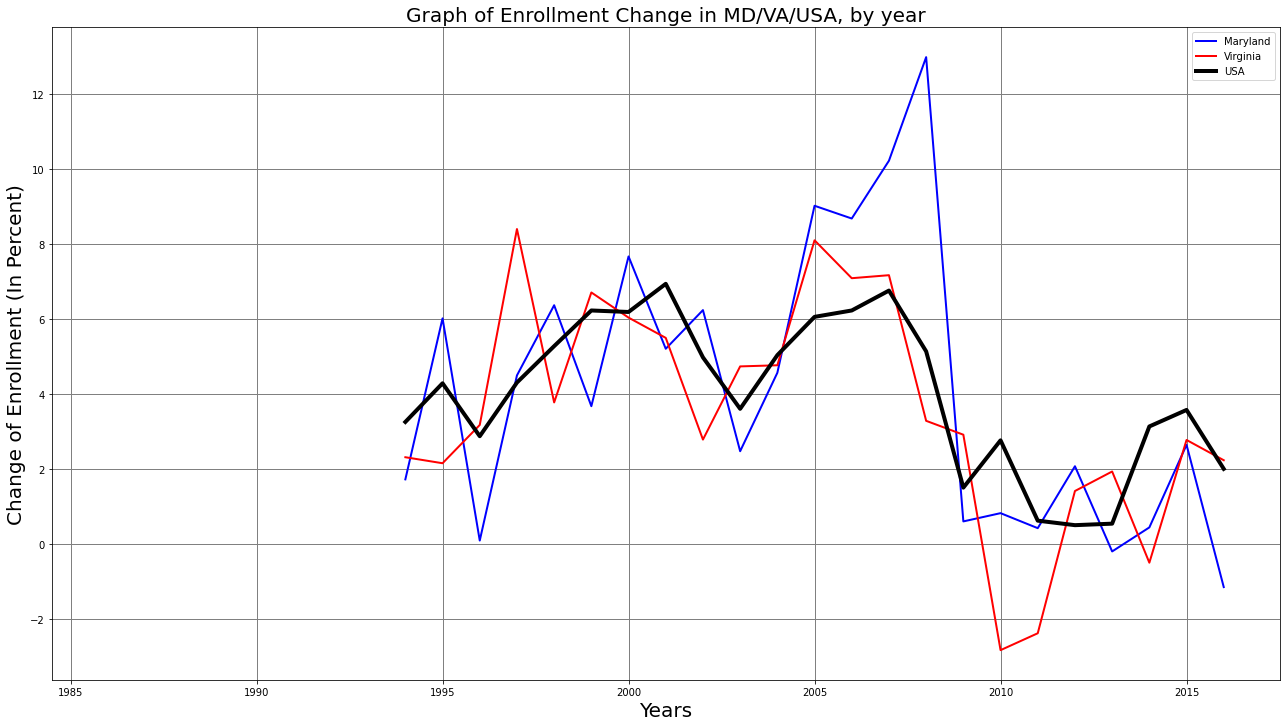

In [743]:
# Decreasing rate of expenditure over time
md_year = md_df['YEAR']
md_enroll = md_df['Total Cost Per Student Percent Change']

va_year = va_df['YEAR']
va_enroll = va_df['Total Cost Per Student Percent Change']

all_year = all_df['YEAR']
all_enroll = all_df['Total Cost Per Student Percent Change']

#Make the plots
fig, ax = plt.subplots(figsize = (22,12))

ax.plot(md_year, md_enroll, color = "blue", label = "Maryland", linewidth = 2)
ax.plot(va_year, va_enroll, color = "red", label = "Virginia", linewidth = 2)
ax.plot(all_year, all_enroll, color = "black", label = "USA", linewidth=4)

ax.grid(color='gray',which='major', linestyle='-', linewidth=1)

gf_font_size = 20

ax.set_title("Graph of Enrollment Change in MD/VA/USA, by year", color='black', size = gf_font_size)
ax.legend()
ax.set_xlabel("Years", color='black', size = gf_font_size)
ax.set_ylabel("Change of Enrollment (In Percent)", color='black', size = gf_font_size)

Unfortunately, there is nothing particularly surprising here. Upon looking through the data of expenditures and enrollment, we can come to the conclusion that Maryland and Virginia run with the country. There has been a slowing of change in student funding recently, with the change approaching or even going negative after 2015, which is obviously disapponting for districts that need money. 

However, for the most part, the spending per school appears to have stayed above 1%. Though inflation averages about 3% per year, it appears as if overall school spending has been OK.

One last look at the basic descriptive statistics here:


In [750]:
all_df['Total Cost Per Student Percent Change'].describe()

count    24.000000
mean      3.829167
std       2.143638
min       0.000000
25%       2.580000
50%       3.950000
75%       5.475000
max       6.940000
Name: Total Cost Per Student Percent Change, dtype: float64

In [751]:
md_df['Total Cost Per Student Percent Change'].describe()

count    24.00000
mean      3.96625
std       3.79803
min      -1.14000
25%       0.57000
50%       3.16500
75%       6.27250
max      12.98000
Name: Total Cost Per Student Percent Change, dtype: float64

In [752]:
va_df['Total Cost Per Student Percent Change'].describe()

count    24.000000
mean      3.402500
std       3.028085
min      -2.820000
25%       2.105000
50%       3.050000
75%       5.635000
max       8.400000
Name: Total Cost Per Student Percent Change, dtype: float64

## H. Next Steps- Exploring the average reading and math scores... thinking about how to do this effectively

Text(0, 0.5, 'Total Student Performance (average reading and math)')

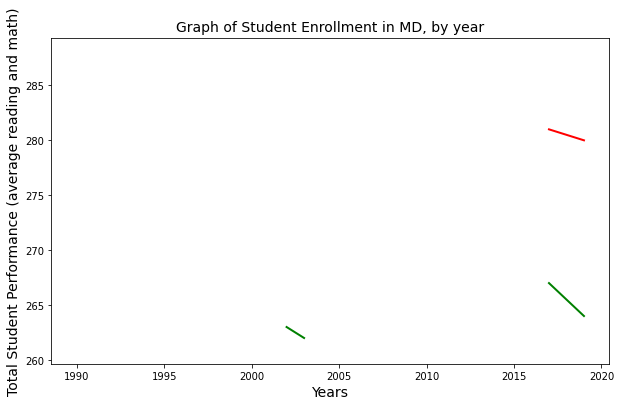

In [742]:
#Showing Progression of funding over years
x = md_df['YEAR']
avg_8_r = md_df['AVG_READING_8_SCORE']
avg_8_m = md_df['AVG_MATH_8_SCORE']

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(x, avg_8_r, 'green', linewidth=2, markersize= 12)
ax.plot(x, avg_8_m, 'red', linewidth=2, markersize= 12)

plt.xscale('linear')

ax.set_title("Graph of Student Enrollment in MD, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Student Performance (average reading and math)", color='black', size = 14)